## **Regresión logística**

En este notebook, profundizaremos en un modelo esencial dentro de los problemas de ***clasificación*** : la regresión logística.

La regresión logística es un modelo lineal que se utiliza para clasificación binaria. *No confundirse por su nombre, se trata de un modelo de clasificación, a diferencia de la regresión lineal que vimos en la práctica anterior.*

Estos modelos se emplean mucho para test de enfermedades, filtros de correo spam, test de embarazo, etc. Es un método que aproxima los puntos por una función logística/sigmoide.

Clasifica separando por una linea. Con ese umbral, determina si una instancia es 0 o 1 -es decir, si pertenece a una categoría o a la otra-.

### **`Función sigmoide`**

Es una función que toma valores continuos y devuelve un valor entre 0 y 1

<img src=".\_src\assets\sigmoide.jpg">

Tiene dos parámetros, w0 y w1. Su rol es parecido al de la pendiente y ordenada al origen en regresión lineal.

w1 = controla la inclinación de la curva en la zona de cambio
w0 = mueve la curva hacia la derecha o la izquierda, según su valor

Lo que hace la regresión logística es encontrar el w0 y w1 que mejor aproximen los puntos pertenecientes a cada clase (esto en el caso de una sola dimensión).

En síntesis, la regresión lineal es el modelo que trata de encontrar la mejor recta que pasa por nuestros puntos. Mientras que la regresión logística trata de encontrar la mejor recta que separa nuestros puntos.

Suele usarse mucho en problemas que necesiten estimar la probabilidad de ocurrencia de algo, ya que cumple con una característica muy importante de una función de probabilidad. ¿Se acuerdan cuál es?

La ecuación general usada para la regresión logística es la siguiente:

$y= \dfrac{e^{(\beta_0 + \beta_1x_1+ \dots+ \beta_p x_p)}}{1 +e^{(\beta_0 + \beta_1x_1+ \dots + \beta_p x_p)}} $

y si estamos trabajando en una dimensión se aproxima de la siguiente forma:

$y= \dfrac{1}{1 +e^{-(\beta_0 + \beta_1x_1)}} $

Pero está función no es lineal. ¿Cómo hacemos entonces para calcular está regresión? Utilizamos una regresión lineal sobre la función de probabilidad logit:

$g(x)=\ln\dfrac{p(x)}{1-p(x)}= \beta_0 + \beta_1 x_1$ 

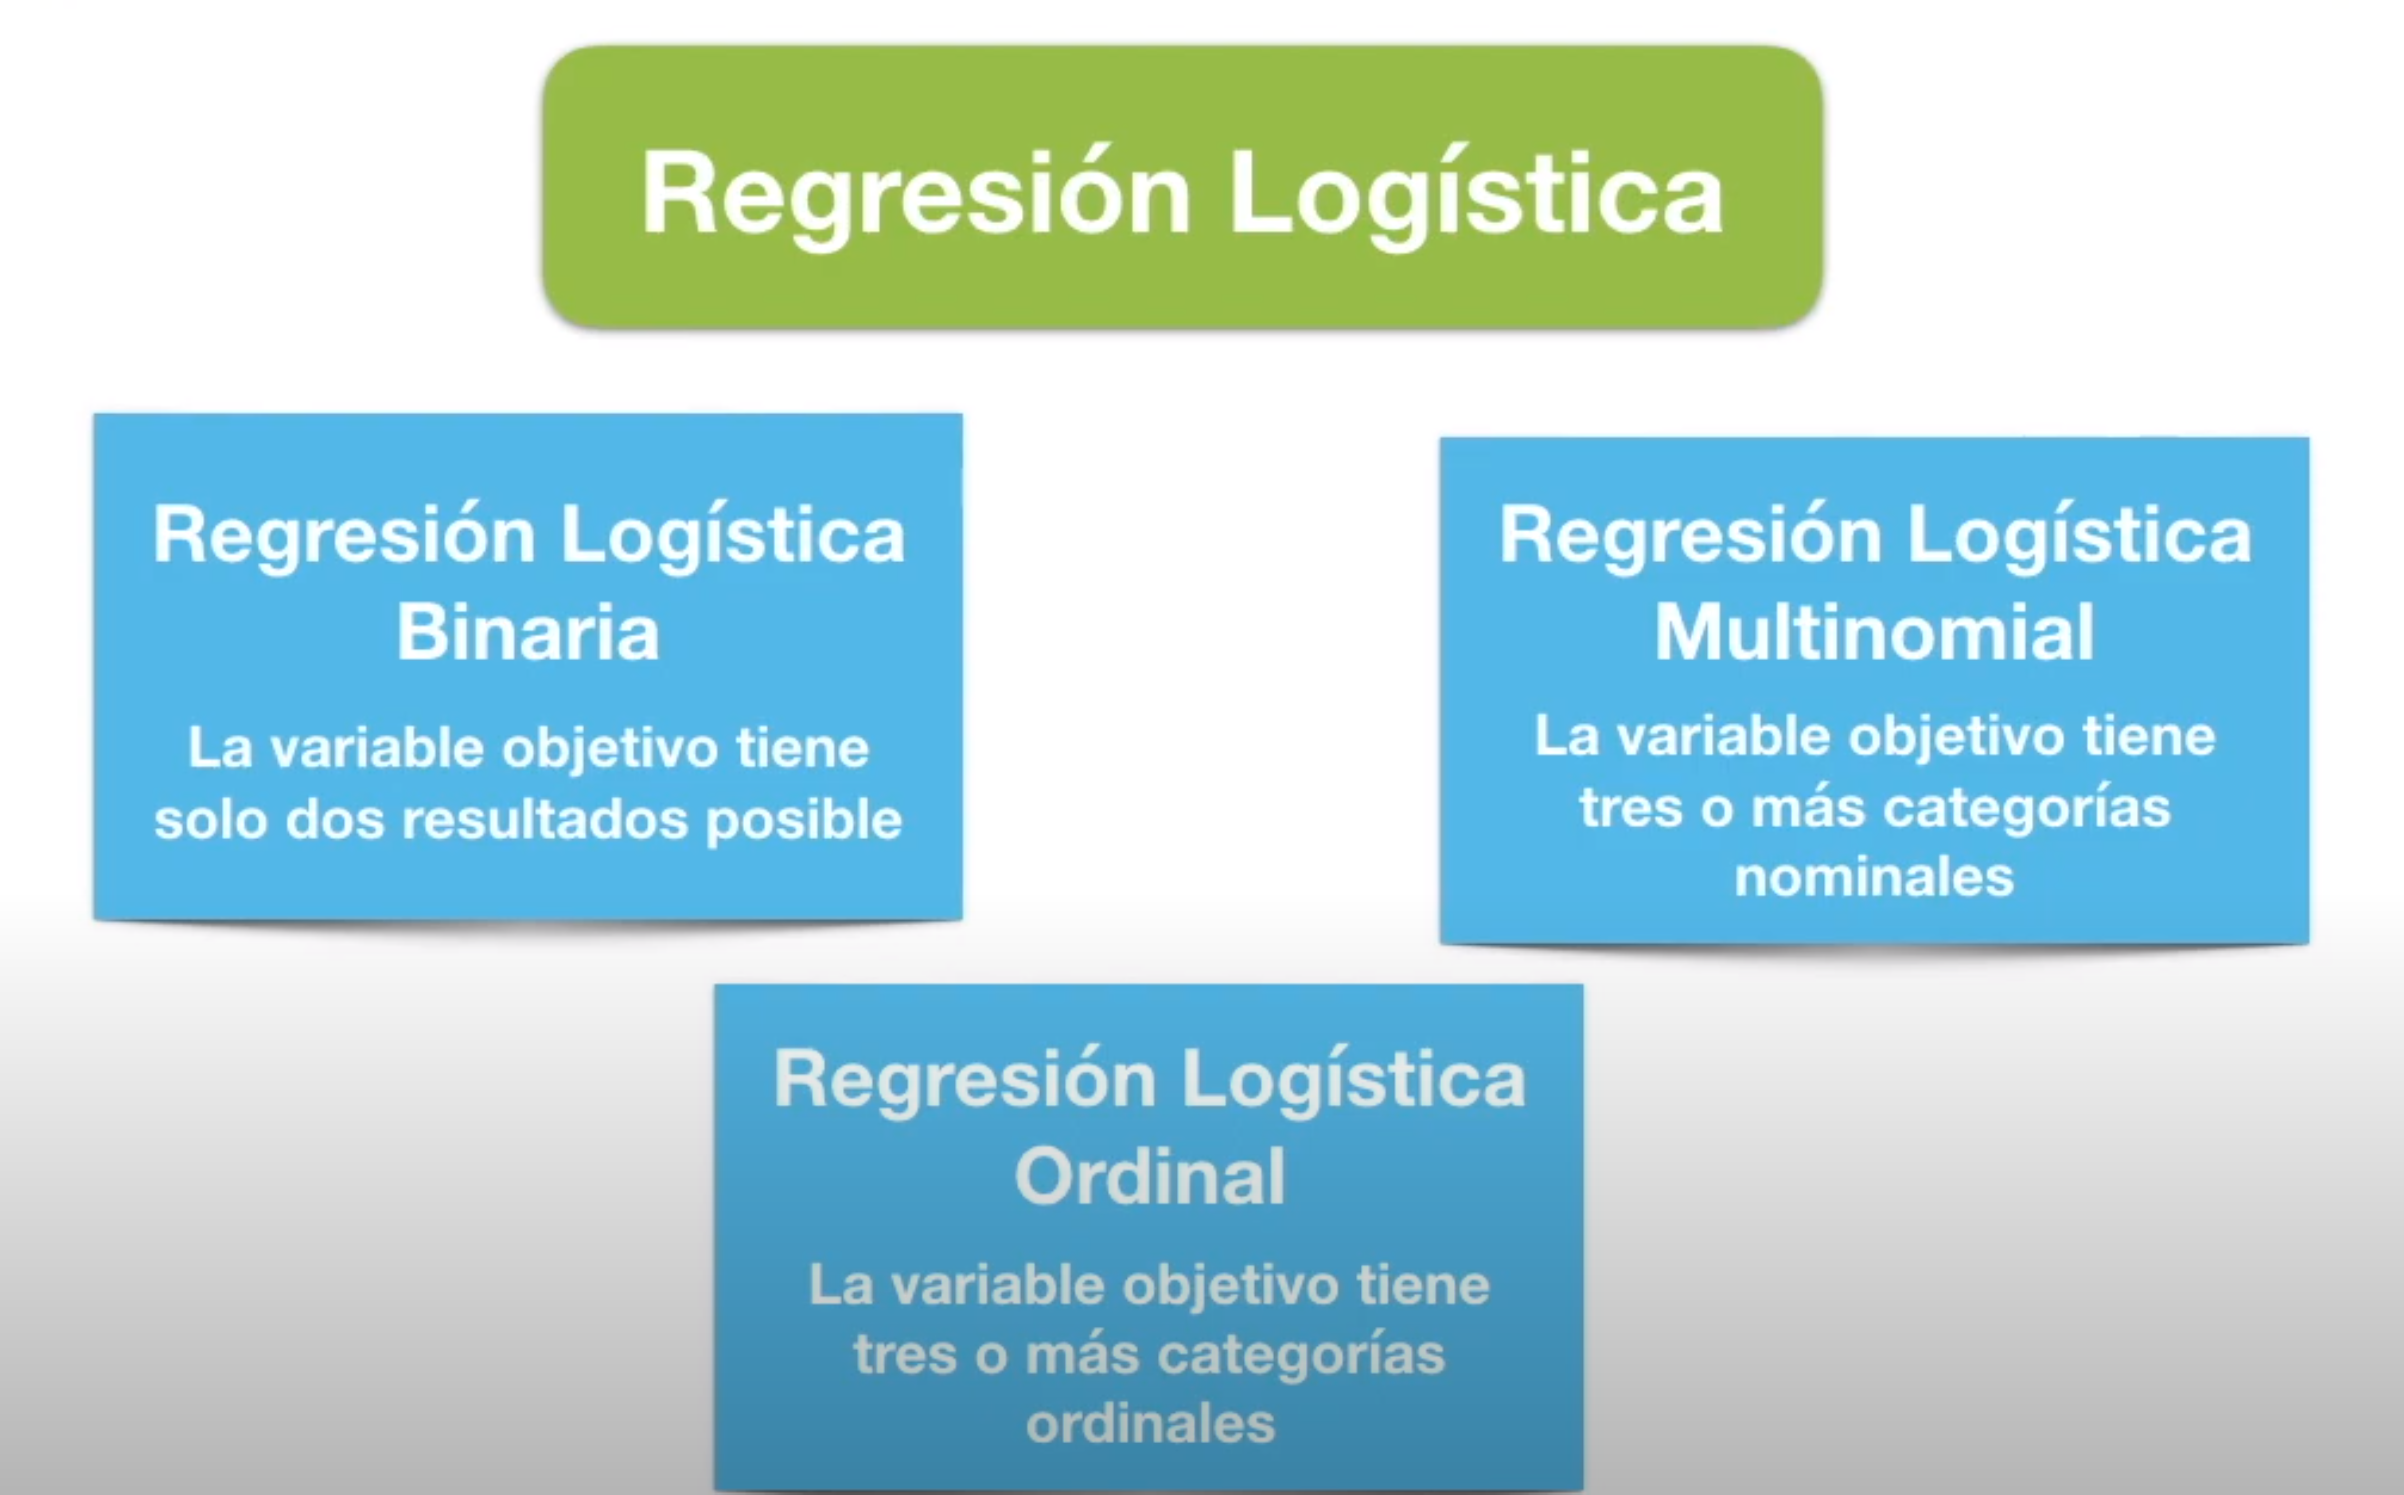

## Implementación con un atributo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

from sklearn.datasets import make_blobs # Importamos el módulo para crear un dataset sintético

In [15]:
# Creamos una función sigmoide
def sigmoid_function(x,w0, w1):
   
    z = w0 + w1*x # función lineal
    y = 1/(1 + np.exp(-z))   # Notar que es una composición
    return y

In [2]:
# Creamos nuestro dataset sintético con la función make_blobs. 
# Este dataset lo haremos con un atributo y dos clases

X, y = make_blobs(n_samples=1000, centers=2, n_features=1,  #centers es el número de clases que queremos tener en nuestro dataset,n_samples es el número de muestras que queremos tener en nuestro dataset
                  random_state=1, cluster_std= 1.5)  # Cluster_std es el desvío estándar de cada cluster

In [4]:
np.shape(X), np.shape(y) # Vemos las dimensiones de nuestro dataset

((1000, 1), (1000,))

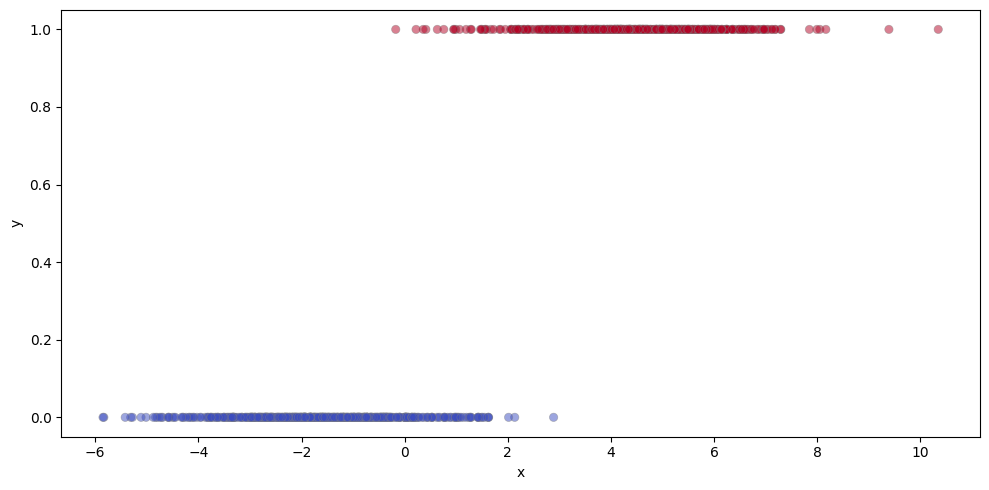

In [5]:
# Graficamos los puntos de nuestro dataset sintético
plt.figure(figsize = (10,5))
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm) 
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

In [6]:
# Importamos la clase que contiene el algoritmo de regresíon logística

from sklearn.linear_model import LogisticRegression

# Instanciamos el modelo y lo entrenamos

clf = LogisticRegression()

# Lo entrenamos

clf.fit(X,y) 

LogisticRegression()

In [7]:
# Importamos una métrica utilizada para evaluar modelos de clasificación. 
# Ya ahondaremos con mayor especificidad en las métricas de clasificación en la clase 3

from sklearn.metrics import accuracy_score 

# Predecimos

y_pred = clf.predict(X)

# Evaluamos

print('El score del modelo es:', accuracy_score(y, y_pred))

El score del modelo es: 0.974


In [18]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,

In [9]:
#predice un punto 
print(clf.predict([[2]]))

#evalua la probabilidad de que sea de una clase u otra
print(clf.predict_proba([[2]])) # la primera columna es la probabilidad de que sea de la clase 0 y la segunda de la clase 1



[1]
[[0.18167749 0.81832251]]


In [10]:
# Observamos los parámetros de la función sigmoide

print(clf.coef_, clf.intercept_) # El primer valor es el parámetro w1 y el segundo es el parámetro w0

[[2.44855129]] [-3.39207913]


In [11]:
l=[[1,3],[2,4]]

In [12]:
l[0][1]

3

In [13]:
clf.coef_[0][0]

2.4485512856688794

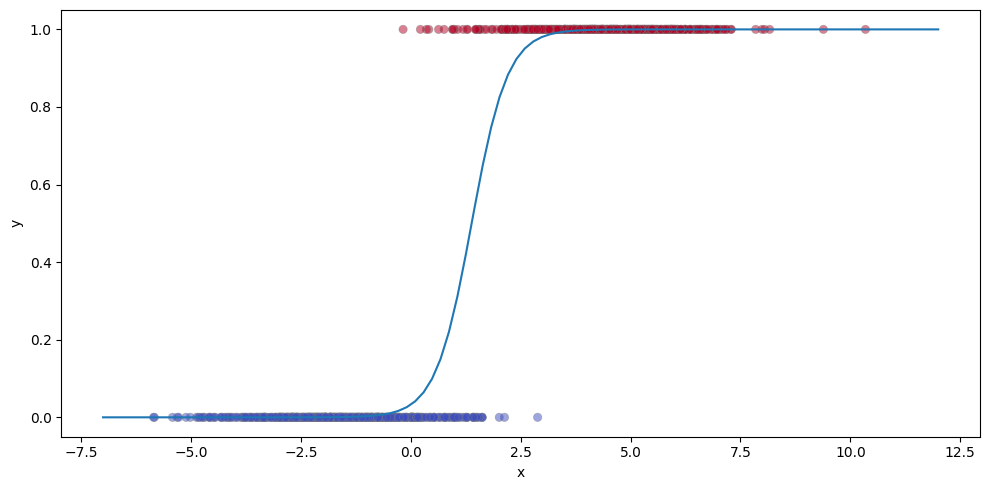

In [16]:
# Graficamos la curva obtenida por la regresión logística

plt.figure(figsize = (10,5))

plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)
x_plot = np.linspace(-7,12,100)
plt.plot(x_plot, sigmoid_function(x_plot,clf.intercept_[0], clf.coef_[0][0])) # El primer parámetro es el intercepto y el segundo es el coeficiente

plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

In [17]:
# lazyclassifier

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, predictions=True,random_state=123)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models


 48%|████▊     | 14/29 [00:00<00:00, 30.29it/s]  File "c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
100%|██████████| 29/29 [00:01<00:00, 22.69it/s]

[LightGBM] [Info] Number of positive: 345, number of negative: 355
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492857 -> initscore=-0.028573
[LightGBM] [Info] Start training from score -0.028573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.98,0.98,0.98,0.98,0.15
GaussianNB,0.98,0.98,0.98,0.98,0.01
RidgeClassifierCV,0.98,0.98,0.98,0.98,0.02
RidgeClassifier,0.98,0.98,0.98,0.98,0.02
QuadraticDiscriminantAnalysis,0.98,0.98,0.98,0.98,0.01
NearestCentroid,0.98,0.98,0.98,0.98,0.18
LogisticRegression,0.98,0.98,0.98,0.98,0.02
LinearDiscriminantAnalysis,0.98,0.98,0.98,0.98,0.03
LinearSVC,0.98,0.98,0.98,0.98,0.01
